# Generate indicators

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import *
from ta.trend import *
from ta.volume import *
from ta.volatility import *
from statsmodels.tsa.stattools import adfuller
import time


import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

## Generating all momentum indicators

In [3]:
# AwesomeOscillatorIndicator,
# KAMAIndicator,
# PercentagePriceOscillator,
# PercentageVolumeOscillator,
# ROCIndicator,
# RSIIndicator,
# StochRSIIndicator,
# StochasticOscillator,
# TSIIndicator,
# UltimateOscillator,
# WilliamsRIndicator

In [133]:
# Indicator
i = TSIIndicator(df.close, 25000, 13000)
indicator = i.tsi()

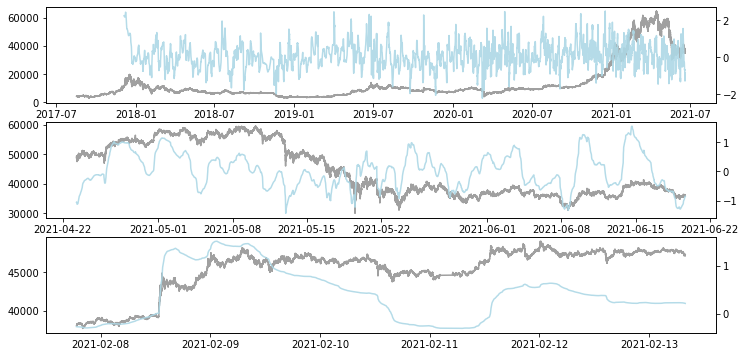

In [134]:
fig, (ax, ax1, ax2) = plt.subplots(3, figsize=(12, 6))

ax.plot(df.close, color="gray", alpha=0.75)
axi = ax.twinx()
axi.plot(indicator, color="lightblue", alpha=.9)

ax1.plot(df.close[-1_000_000:], color="gray", alpha=0.75)
ax1i = ax1.twinx()
ax1i.plot(indicator[-1_000_000:], color="lightblue", alpha=.9)

ax2.plot(df.close[-2_000_000:-1_900_000], color="gray", alpha=0.75)
ax2i = ax2.twinx()
ax2i.plot(indicator[-2_000_000:-1_900_000], color="lightblue", alpha=.9);

In [135]:
# indicator = df.close - indicator

In [136]:
start = time.time()
a = adfuller(indicator.dropna(), maxlag=2,regression='c',autolag=None)
one = a[4]["1%"]
five = a[4]["5%"]
print(f"Calculation took {round(time.time()-start, 2)} seconds")
print(f"p-val: {round(a[1], 4)}")
print(f"score: {round(a[0], 2)}, compared to 1% ({round(one, 2)}) and 5% ({round(five, 2)})")

Calculation took 8.8 seconds
p-val: 0.0
score: -16.67, compared to 1% (-3.43) and 5% (-2.86)


In [137]:
indicator.to_csv("../data/i15.csv")